In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#make dates the index - Can do if it's a unique value for each row; in this case it is
#format dates as we load the data - do only for automatically collected data
# if data was entered manually, humans may have used different formats and you'd get bad data.

tv_df = pd.read_csv('datasets/trafficviolations_2019.csv', parse_dates=True)
tv_df.head()

C:\Users\Sarah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (20,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,2019-07-30,22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,...,21-801.1,Transportation Article,False,ASIAN,F,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)"
1,3b060228-d664-4480-9314-6188ee8ac891,2019-07-07,22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,...,21-707(a),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)"
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,2019-07-10,16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,...,11-393.9,Maryland Rules,False,HISPANIC,M,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)"
3,abd509c6-edb3-4818-b90a-477cf92755e6,2019-08-15,22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,No,...,22-204(f),Transportation Article,False,WHITE,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)"
4,021d5a2d-7989-4b52-a983-7f6e462fc123,2019-04-15,05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,...,21-309(b),Transportation Article,False,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [3]:
# Check data types
tv_df.dtypes

SeqID                       object
Date Of Stop                object
Time Of Stop                object
Agency                      object
SubAgency                   object
Description                 object
Location                    object
Latitude                   float64
Longitude                  float64
Accident                    object
Belts                       object
Personal Injury             object
Property Damage             object
Fatal                       object
Commercial License          object
HAZMAT                      object
Commercial Vehicle          object
Alcohol                     object
Work Zone                   object
Search Conducted            object
Search Disposition          object
Search Outcome              object
Search Reason               object
Search Reason For Stop      object
Search Type                 object
Search Arrest Reason        object
State                       object
VehicleType                 object
Year                

In [4]:
#Convert column into date time and format a specific way; assign it to 'date' column

tv_df['date'] = pd.to_datetime(tv_df['Date Of Stop'], format='%Y-%m-%d')

In [5]:
#Convert column into date time and format a specific way; assign it to 'time' column

tv_df['time'] = pd.to_datetime(tv_df['Time Of Stop'], format='%H:%M:%S')

In [6]:
# Check data types
tv_df.dtypes

SeqID                              object
Date Of Stop                       object
Time Of Stop                       object
Agency                             object
SubAgency                          object
Description                        object
Location                           object
Latitude                          float64
Longitude                         float64
Accident                           object
Belts                              object
Personal Injury                    object
Property Damage                    object
Fatal                              object
Commercial License                 object
HAZMAT                             object
Commercial Vehicle                 object
Alcohol                            object
Work Zone                          object
Search Conducted                   object
Search Disposition                 object
Search Outcome                     object
Search Reason                      object
Search Reason For Stop            

In [7]:
# Review data
tv_df.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,date,time
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,2019-07-30,22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,...,False,ASIAN,F,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)",2019-07-30,1900-01-01 22:15:00
1,3b060228-d664-4480-9314-6188ee8ac891,2019-07-07,22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,...,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)",2019-07-07,1900-01-01 22:54:00
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,2019-07-10,16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,...,False,HISPANIC,M,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)",2019-07-10,1900-01-01 16:00:00
3,abd509c6-edb3-4818-b90a-477cf92755e6,2019-08-15,22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,No,...,False,WHITE,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)",2019-08-15,1900-01-01 22:42:00
4,021d5a2d-7989-4b52-a983-7f6e462fc123,2019-04-15,05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,...,False,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)",2019-04-15,1900-01-01 05:49:00


In [8]:
# Get the day of the week for each

tv_df['weekday'] = tv_df['date'].dt.dayofweek


In [9]:
# Extract month value and create new column with it

tv_df['month'] = tv_df['date'].dt.month


In [10]:
# Extract hour value and create new column with it
# Review data

tv_df['hour'] = tv_df['time'].dt.hour
tv_df

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Driver City,Driver State,DL State,Arrest Type,Geolocation,date,time,weekday,month,hour
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,2019-07-30,22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,...,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)",2019-07-30,1900-01-01 22:15:00,1,7,22
1,3b060228-d664-4480-9314-6188ee8ac891,2019-07-07,22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,...,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)",2019-07-07,1900-01-01 22:54:00,6,7,22
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,2019-07-10,16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,...,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)",2019-07-10,1900-01-01 16:00:00,2,7,16
3,abd509c6-edb3-4818-b90a-477cf92755e6,2019-08-15,22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,No,...,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)",2019-08-15,1900-01-01 22:42:00,3,8,22
4,021d5a2d-7989-4b52-a983-7f6e462fc123,2019-04-15,05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,...,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)",2019-04-15,1900-01-01 05:49:00,0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188584,2192dfab-5f77-47f8-8f3e-3ede40656633,2019-04-20,22:15:00,MCP,"1st District, Rockville",STOP LIGHTS (*),355 AND MT. VERNON PL.,39.079075,-77.141672,No,...,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.079075, -77.1416716666667)",2019-04-20,1900-01-01 22:15:00,5,4,22
188585,ce065ca3-0f2d-489a-92fd-ea08e6f9bfe4,2019-05-02,14:25:00,MCP,"1st District, Rockville",TAILLIGHTS (*),355 @ WEST GUDE,39.106625,-77.159673,No,...,ROCKVILLE,MD,MD,A - Marked Patrol,"(39.106625, -77.1596733333333)",2019-05-02,1900-01-01 14:25:00,3,5,14
188586,511abcb8-9380-4ada-9145-b340e0f4fc18,2019-07-02,08:21:00,MCP,"1st District, Rockville",TAILLIGHTS (*),430 HUNGERFORD DR,39.089310,-77.151342,No,...,ROCKVILLE,MD,MD,A - Marked Patrol,"(39.08931, -77.1513416666667)",2019-07-02,1900-01-01 08:21:00,1,7,8
188587,81da489e-9c64-4ee7-b161-d52406343695,2019-08-01,03:29:00,MCP,Headquarters and Special Operations,"DRIVING, ATTEMPTING TO DRIVE VEH WHILE SO FAR ...",WAYNE @ DALE DR,39.045455,-76.991120,No,...,BOWIE,MD,MD,A - Marked Patrol,"(39.045455, -76.99112)",2019-08-01,1900-01-01 03:29:00,3,8,3


In [11]:
# Import seaborn for charts
import seaborn as sns

Text(0.5, 1.0, 'Frequency of Violations by Month')

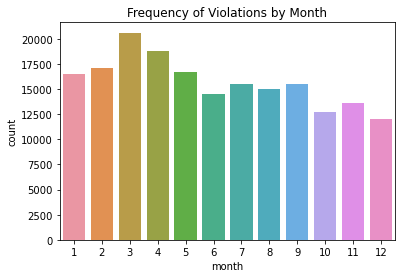

In [12]:
# Count of Violations by month.  Violations peak in March, fall through the spring, level off
# for the summer months, then drop starting in the fall, through the end of the year.  In January
# they rise again until spring.  So, by season, they rise during the winter, drop through the spring,
# level off for the summer months, and then drop again in the fall.  They are generally highest around
# Cherry blossom time and lowest in the fall.

sns.countplot(x='month',
              data=tv_df)
plt.title('Frequency of Violations by Month')

Text(0.5, 1.0, 'Frequency of Violations by Hour')

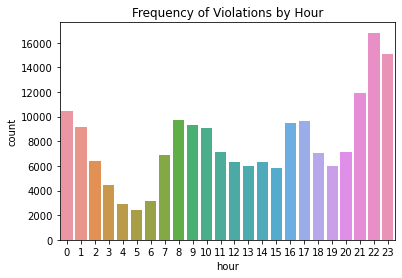

In [13]:
# Count of Violations by hour.  Violations peak from 10-11pm, then decline until their lowest point at 6am,
# rise to a lower peak from 8-11 am, taper off midday, with a burst from 4-6 pm, then fall until 8 pm, when they 
# rise towards the 10pm peak.  So, late night peak; early morning lull, rush hour small peaks.

sns.countplot(x='hour',
              data=tv_df)
plt.title('Frequency of Violations by Hour')

Text(0.5, 1.0, 'Frequency of Violations by Weekday')

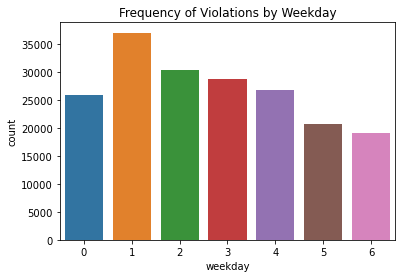

In [14]:
# Count of Violations by day of week (Monday is 0).  Violations peak on Tuesday,
# decline through the week to the weekend, and move back up on Monday.

sns.countplot(x='weekday',
              data=tv_df)
plt.title('Frequency of Violations by Weekday')